In [477]:
import pandas as pd
import numpy as np
import random as rnd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [478]:
#데이터 가져오기
train_df = pd.read_csv("/Users/seungwoo/Desktop/python/titanic/data_titanic/train.csv")
test_df = pd.read_csv("/Users/seungwoo/Desktop/python/titanic/data_titanic/test.csv")

In [479]:
combine = [train_df, test_df]

In [480]:
#데이터 미리보기
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [481]:
#데이터 미리보기
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [482]:
#info를 통해 data 확인하기
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [483]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [484]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [485]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [486]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [487]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


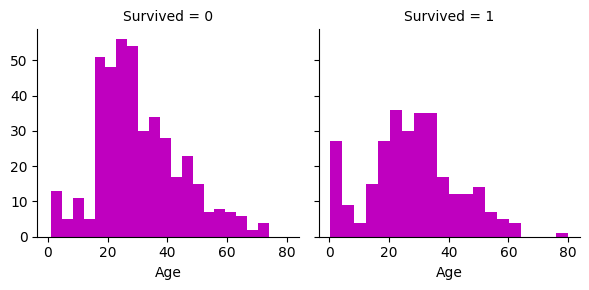

In [488]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20, color='m')

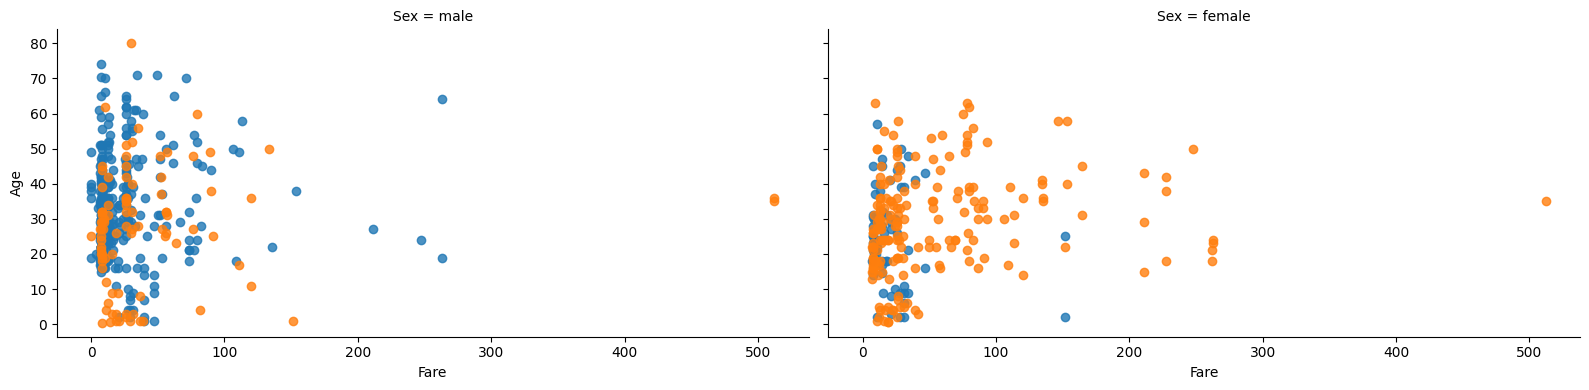

In [489]:
g = sns.FacetGrid(train_df, col = 'Sex', hue='Survived', height=4, aspect=2)
g.map(sns.regplot, 'Fare', 'Age', fit_reg = False)

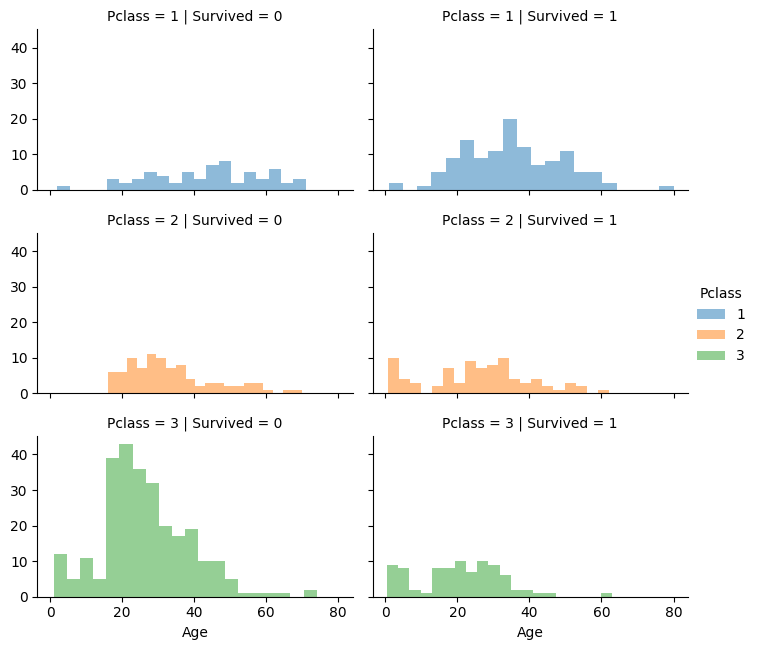

In [490]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha =.5, bins = 20)
grid.add_legend()

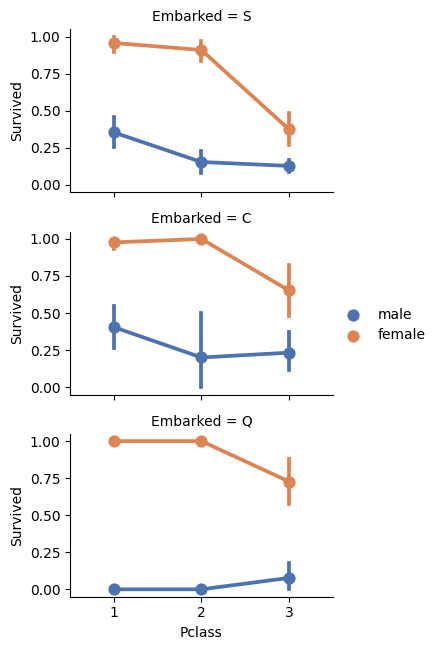

In [491]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

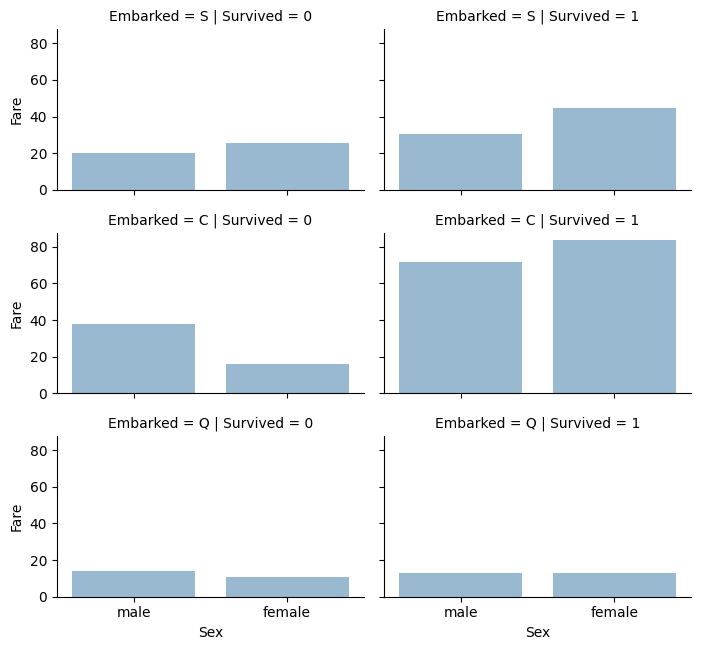

In [492]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=["male", "female"])

grid.add_legend()

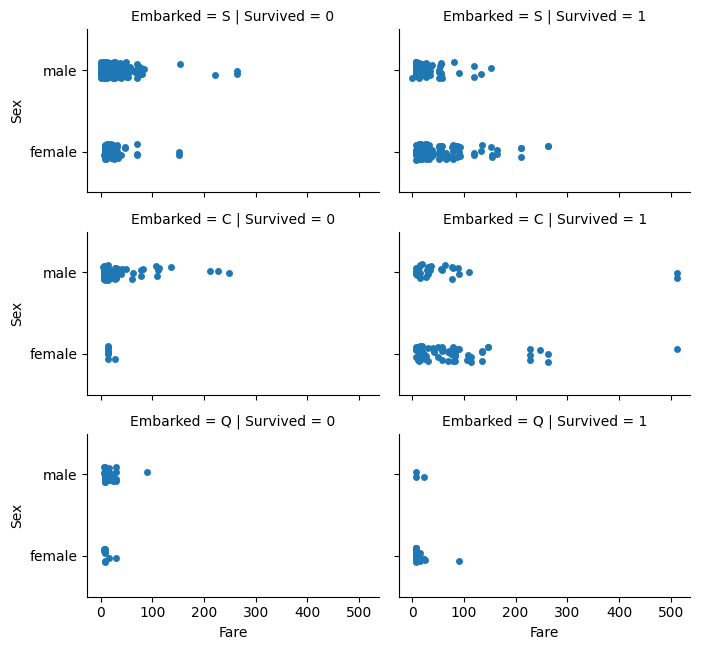

In [493]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.stripplot, 'Fare', 'Sex',  order=["male", "female"])

grid.add_legend()

In [494]:
print("Before \n", train_df.shape, test_df.shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print("After \n", train_df.shape, test_df.shape)

Before 
 (891, 12) (418, 11)
After 
 (891, 10) (418, 9)


In [495]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [496]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [497]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [498]:
print("Before", train_df.shape, test_df.shape)
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
print("After", train_df.shape, test_df.shape)

Before (891, 11) (418, 10)
After (891, 9) (418, 9)


In [499]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


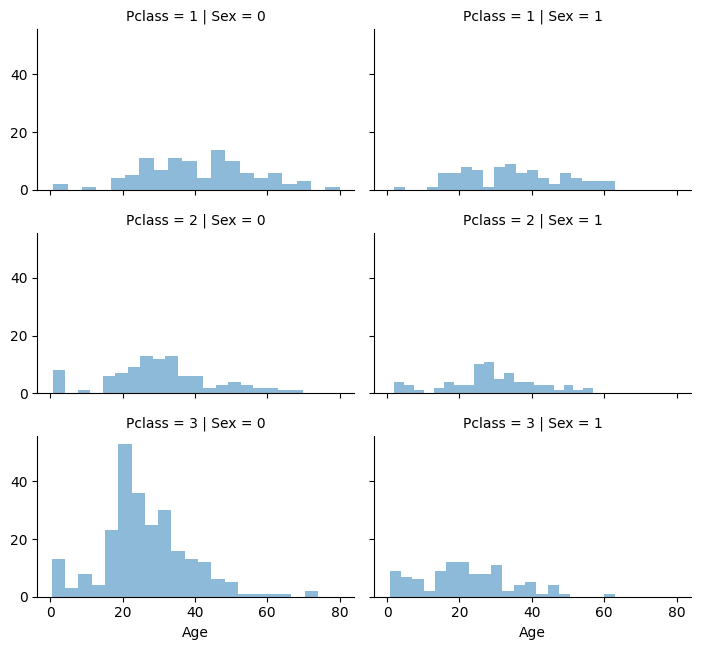

In [500]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [501]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [502]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex']== i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름
            
            age_guess = guess_df.median()

            # age의 random값의 소수점을 .5에 가깝도록 변형
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [503]:
train_df.loc[ train_df['Age'] <= 10, 'Age_clean'] = 0
train_df.loc[(train_df['Age'] > 10) & (train_df['Age'] <= 16), 'Age_clean'] = 1
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20), 'Age_clean'] = 2
train_df.loc[(train_df['Age'] > 20) & (train_df['Age'] <= 26), 'Age_clean'] = 3
train_df.loc[(train_df['Age'] > 26) & (train_df['Age'] <= 30), 'Age_clean'] = 4
train_df.loc[(train_df['Age'] > 30) & (train_df['Age'] <= 36), 'Age_clean'] = 5
train_df.loc[(train_df['Age'] > 36) & (train_df['Age'] <= 40), 'Age_clean'] = 6
train_df.loc[(train_df['Age'] > 40) & (train_df['Age'] <= 46), 'Age_clean'] = 7
train_df.loc[(train_df['Age'] > 46) & (train_df['Age'] <= 50), 'Age_clean'] = 8
train_df.loc[(train_df['Age'] > 50) & (train_df['Age'] <= 60), 'Age_clean'] = 9
train_df.loc[ train_df['Age'] > 60, 'Age_clean'] = 10

test_df.loc[ test_df['Age'] <= 10, 'Age_clean'] = 0
test_df.loc[(test_df['Age'] > 10) & (test_df['Age'] <= 16), 'Age_clean'] = 1
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20), 'Age_clean'] = 2
test_df.loc[(test_df['Age'] > 20) & (test_df['Age'] <= 26), 'Age_clean'] = 3
test_df.loc[(test_df['Age'] > 26) & (test_df['Age'] <= 30), 'Age_clean'] = 4
test_df.loc[(test_df['Age'] > 30) & (test_df['Age'] <= 36), 'Age_clean'] = 5
test_df.loc[(test_df['Age'] > 36) & (test_df['Age'] <= 40), 'Age_clean'] = 6
test_df.loc[(test_df['Age'] > 40) & (test_df['Age'] <= 46), 'Age_clean'] = 7
test_df.loc[(test_df['Age'] > 46) & (test_df['Age'] <= 50), 'Age_clean'] = 8
test_df.loc[(test_df['Age'] > 50) & (test_df['Age'] <= 60), 'Age_clean'] = 9
test_df.loc[ test_df['Age'] > 60, 'Age_clean'] = 10

In [504]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_clean
0,0,3,0,22,1,0,7.2500,S,1,3.0
1,1,1,1,38,1,0,71.2833,C,3,6.0
2,1,3,1,26,0,0,7.9250,S,2,3.0
3,1,1,1,35,1,0,53.1000,S,3,5.0
4,0,3,0,35,0,0,8.0500,S,1,5.0


In [505]:
print("Before \n", train_df.columns)
train_df = train_df.drop(['Age'], axis = 1)
test_df = test_df.drop(['Age'], axis = 1)
combine = [train_df, test_df]
print("After \n", train_df.columns)

Before 
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Age_clean'],
      dtype='object')
After 
 Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'Age_clean'],
      dtype='object')


In [506]:
for dataset in combine : 
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [507]:
 for dataset in combine:
     dataset['IsAlone'] = 0
     dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
 train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [508]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_clean,FamilySize,IsAlone
0,0,3,0,7.2500,S,1,3.0,2,0
1,1,1,1,71.2833,C,3,6.0,2,0
2,1,3,1,7.9250,S,2,3.0,1,1
3,1,1,1,53.1000,S,3,5.0,2,0
4,0,3,0,8.0500,S,1,5.0,1,1


In [509]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age_clean * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age_clean', 'Pclass']].head(10)

,Age*Class,Age_clean,Pclass
0,9.0,3.0,3
1,6.0,6.0,1
2,9.0,3.0,3
3,5.0,5.0,1
4,15.0,5.0,3
5,9.0,3.0,3
6,9.0,9.0,1
7,0.0,0.0,3
8,12.0,4.0,3
9,2.0,1.0,2


In [510]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           1
Embarked       0
Title          0
Age_clean      0
FamilySize     0
IsAlone        0
Age*Class      0
dtype: int64

In [511]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [512]:
train_df['Embarked'].isnull().sum()

2

In [513]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [514]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [515]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_clean,FamilySize,IsAlone,Age*Class
0,0,3,0,7.2500,0,1,3.0,2,0,9.0
1,1,1,1,71.2833,1,3,6.0,2,0,6.0
2,1,3,1,7.9250,0,2,3.0,1,1,9.0
3,1,1,1,53.1000,0,3,5.0,2,0,5.0
4,0,3,0,8.0500,0,1,5.0,1,1,15.0


In [516]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Fare          0
Embarked      0
Title         0
Age_clean     0
FamilySize    0
IsAlone       0
Age*Class     0
dtype: int64

In [517]:
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_clean,FamilySize,IsAlone,Age*Class
0,0,3,0,7.2500,0,1,3.0,2,0,9.0
1,1,1,1,71.2833,1,3,6.0,2,0,6.0
2,1,3,1,7.9250,0,2,3.0,1,1,9.0
3,1,1,1,53.1000,0,3,5.0,2,0,5.0
4,0,3,0,8.0500,0,1,5.0,1,1,15.0


In [518]:
test_df['Fare'].fillna(0, inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Title,Age_clean,FamilySize,IsAlone,Age*Class
0,892,3,0,7.8292,2,1,5.0,1,1,15.0
1,893,3,1,7.0000,0,3,8.0,2,0,24.0
2,894,2,0,9.6875,2,1,10.0,1,1,20.0
3,895,3,0,8.6625,0,1,4.0,1,1,12.0
4,896,3,1,12.2875,0,3,3.0,3,0,9.0


In [519]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [520]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_clean,FamilySize,IsAlone,Age*Class
0,0,3,0,0,0,1,3.0,2,0,9.0
1,1,1,1,3,1,3,6.0,2,0,6.0
2,1,3,1,1,0,2,3.0,1,1,9.0
3,1,1,1,3,0,3,5.0,2,0,5.0
4,0,3,0,1,0,1,5.0,1,1,15.0
5,0,3,0,1,2,1,3.0,1,1,9.0
6,0,1,0,3,0,1,9.0,1,1,9.0
7,0,3,0,2,0,4,0.0,5,0,0.0
8,1,3,1,1,0,3,4.0,3,0,12.0
9,1,2,1,2,1,3,1.0,2,0,2.0


In [521]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [522]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.93

In [523]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.196731
4,Title,0.474139
2,Fare,0.240380
3,Embarked,0.209424
8,Age*Class,0.005561
5,Age_clean,-0.231053
7,IsAlone,-0.403318
6,FamilySize,-0.463015
0,Pclass,-0.975097


In [524]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.72

In [525]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn


87.21

In [526]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.21

In [527]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.92

In [528]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

72.39

In [529]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.92

In [530]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

81.14

In [531]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.91

In [532]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100 ,2)
acc_random_forest

90.91

In [533]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,90.91
8,Decision Tree,90.91
1,KNN,87.21
0,Support Vector Machines,82.72
2,Logistic Regression,81.93
6,Stochastic Gradient Decent,81.14
4,Naive Bayes,80.92
7,Linear SVC,80.92
5,Perceptron,72.39


In [535]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('/Users/seungwoo/Desktop/python/titanic/titanic_submission/submission_7.csv', index=False)